In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,2,2,1], padding='SAME')
    
def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides=[1,2,2,1], padding='SAME')

def weight_variable(shape):
    initial = tf.random_normal(shape, mean=0.0, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.random_normal(shape, mean=0.0, stddev=0.01)
    return tf.Variable(initial)

In [26]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape = [None, 784])
x_origin = tf.reshape(x, [-1,28,28,1])


W_e_conv1 = weight_variable([5,5,1,16])
b_e_conv1 = bias_variable([16])
h_e_conv1 = tf.nn.relu(tf.add(conv2d(x_origin, W_e_conv1), b_e_conv1))

W_e_conv2 = weight_variable([5,5,16,32])
b_e_conv2 = bias_variable([32])
h_e_conv2 = tf.nn.relu(tf.add(conv2d(h_e_conv1, W_e_conv2), b_e_conv2))

code_layer = h_e_conv2
print("code layer shape : %s" % h_e_conv2.get_shape())

W_d_conv1 = weight_variable([5,5,16,32])
b_d_conv1 = bias_variable([16])
output_shape_d_conv1 = tf.stack([tf.shape(x)[0], 14, 14, 16])
h_d_conv1 = tf.nn.relu(tf.add(deconv2d(h_e_conv2, W_d_conv1, output_shape_d_conv1), b_d_conv1))

W_d_conv2 = weight_variable([5, 5, 1, 16])
b_d_conv2 = bias_variable([1])
output_shape_d_conv2 = tf.stack([tf.shape(x)[0], 28, 28, 1])
h_d_conv2 = tf.nn.relu(tf.add(deconv2d(h_d_conv1, W_d_conv2, output_shape_d_conv2), b_d_conv2))

x_reconstruct = h_d_conv2
print("reconstruct layer shape : %s" % x_reconstruct.get_shape())

code layer shape : (?, 7, 7, 32)
reconstruct layer shape : (?, 28, 28, 1)


In [27]:
loss = tf.reduce_mean(tf.pow(x_reconstruct - x_origin, 2))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [28]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])



epoch:  0  , loss:  2.36482e-05
epoch:  10  , loss:  0.000431394
epoch:  20  , loss:  6.89903e-06
epoch:  30  , loss:  6.78362e-06
epoch:  40  , loss:  5.1658e-06
epoch:  50  , loss:  4.70223e-06


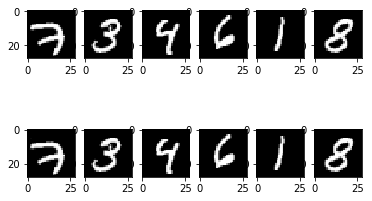

In [47]:
#Autoencoder
for epoch in range(51):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step, feed_dict={x: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%10==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss, feed_dict={x: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(x_reconstruct, feed_dict={x:x_train})])
x_train2 = np.array([np.reshape(m,(28,28)) for m in x_train])

fig, ax = plt.subplots(nrows=2, ncols=6)

for i0 in range(len(ax[0])):
    ax[0][i0].imshow(x_train2[i0], cmap='gray')
for i1 in range(len(ax[1])):
    ax[1][i1].imshow(x_ae[i1], cmap='gray')

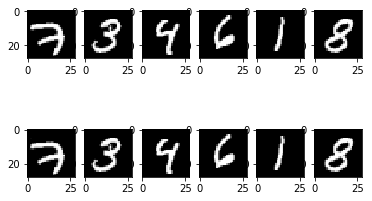

In [50]:
# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(x_reconstruct, feed_dict={x:x_train})])
x_train2 = np.array([np.reshape(m,(28,28)) for m in x_train])

fig, ax = plt.subplots(nrows=2, ncols=6)

for i0 in range(len(ax[0])):
    ax[0][i0].imshow(x_train2[i0], cmap='gray')
for i1 in range(len(ax[1])):
    ax[1][i1].imshow(x_ae[i1], cmap='gray')